# How to Use Unsupervised Clustering on Well Log Data

Understanding the subsurface lithology is an important task in geoscience and petrophysics. Using a variety of electrical measurements generated from well logging technology we are able to make inferences about the underlying geology, such as the lithology, facies, porosity, and permeability. 

Machine Learning algorithms have routinely been adopted to group well log measurements into distinct lithological groupings, known as facies. This process can be achieved using either unsupervised learning or supervised learning algorithms. 

In this tutorial we will be carrying out unsupervised learning classification using three clustering methods (K Means Clustering, Gaussian Mixture Modelling and DBSCAN) and comparing the results with an established Lithofacies curve.

## What is Clustering / Cluster Analysis?
Clustering of data is a common form of exploratory data analysis (EDA) which is used to divide up the data into different groups based on shared characteristics or properties. Data points that are similar to each other are grouped together in the same cluster, and those that are different are placed in another cluster.

### K-Means Clustering
K-Means clustering is a very commonly used unsupervised machine learning algorithm. It is used to group data into K number of clusters by minimising the distance between the data point and the centroid. 

The centroid is initialised at k random points in the data space and all points around it are assigned to the relevant cluster based on the distance to the centroid. The centroid is then adjusted to the central point of the cluster and the points surrounding it are reassigned. This continues until either there is no change in the centroids or the points remain in the same cluster or until a maximum number of iterations is reached.

K-Means is a hard clustering method where a data point either belongs to a cluster or it does not. It also carries out clustering by applying a circle (or hyper-sphere in multi-dimensional datasets)to the data.


### Gaussian Mixture Modelling
The GMM method also allows data points to be clustered, except that it accounts for data variance, results in a softer classification and rather than being distance based it is distribution based. 

Also, the data point being classified has a probability of being one cluster or another. 

While K-Means clustering works great if the data clusters are circular, however, in petrophysical and geological situations data rarely forms nice circular patterns. GMM modelling uses eliptical shaped cluster/decision boundaries and are therefore more flexible.

An excellent article looking at the differences between the two methods can be found at https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/

## Dataset
The dataset we are using for this tutorial is from the Taranaki Basin, realeased as part of the open source data made available by the New Zealand Department of Energy

## Importing Libraries & Data Loading
The first step of the project is to import the libraries that we require.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as colors
import lasio
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

We will then read in the data using `lasio.read` and then view the data description using the `describe()` method. 

In [255]:
las = lasio.read("/Users/isaacabrahamodeh/Desktop/Taranaki-wells/Taranaki/rahi-1_final.las")

In [256]:
well = las.df()

In [257]:
well

,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESS,SP,TEMP,TENS
DEPTH,,,,,,,,,,,,,
136.0932,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.6257,1052.5375
136.2456,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.6382,1044.8145
136.3980,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.6507,1037.0916
136.5504,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.6615,1041.8923
136.7028,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.6688,1072.0391
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499.8660,8.5,8.4109,NaN,NaN,NaN,NaN,NaN,NaN,32.7073,35.9277,NaN,101.1369,NaN
3500.0184,8.5,8.4369,NaN,NaN,NaN,NaN,NaN,NaN,35.5133,37.5251,NaN,101.1369,NaN
3500.1708,8.5,8.4355,NaN,NaN,NaN,NaN,NaN,NaN,46.5430,49.7061,NaN,101.1369,NaN


In [258]:
well.dropna(inplace=True)

In [259]:
well

,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESS,SP,TEMP,TENS
DEPTH,,,,,,,,,,,,,
1047.1404,12.25,12.5827,2.3200,0.01474,131.0879,96.5691,0.3552,3.2072,1.7545,1.3217,-178.7157,49.4678,1557.9052
1047.2928,12.25,12.6405,2.3027,0.00971,133.4555,97.1223,0.3569,3.1241,1.7213,1.2993,-179.4189,49.4633,1549.8719
1047.4452,12.25,12.6984,2.2854,0.00467,135.8230,97.6755,0.3586,3.0410,1.6880,1.2770,-180.1220,49.4588,1541.8386
1047.5976,12.25,12.7394,2.2790,0.00319,137.8991,97.4284,0.3603,3.0260,1.6597,1.2560,-179.9580,49.4589,1541.3611
1047.7500,12.25,12.7711,2.2788,0.00370,139.8116,96.7319,0.3620,3.0494,1.6341,1.2358,-179.3071,49.4617,1545.1257
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3478.8348,8.50,8.6053,2.5522,0.05202,48.8714,117.6758,0.1865,3.6850,11.1861,10.3653,-159.8607,100.9251,2249.2415
3478.9872,8.50,8.6531,2.5505,0.06100,48.5646,121.8867,0.1067,3.2586,12.5267,10.9448,-161.4788,100.9415,2229.8521
3479.1396,8.50,8.6975,2.5374,0.08276,49.7781,118.7337,0.0984,3.4343,10.8417,9.8769,-162.2352,100.9528,2243.6758


In [260]:
well.describe()

,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESS,SP,TEMP,TENS
count,11844.000000,11844.000000,11844.000000,11844.000000,11844.000000,11844.000000,11844.000000,11844.000000,11844.000000,11844.000000,11844.000000,11844.000000,11844.000000
mean,11.033561,11.013662,2.405997,0.013122,93.304903,85.233422,0.274040,3.069770,16.538564,5.804376,-168.654370,68.343266,1890.258227
std,1.755614,1.716727,0.099578,0.025262,15.542112,18.016423,0.083689,0.438347,499.691582,37.964272,12.178017,16.824150,209.732268
min,8.500000,8.163700,1.270800,-0.027850,41.216300,32.972000,-0.014900,0.925500,0.944400,0.752400,-188.793100,49.458800,1493.684800
25%,8.500000,8.672675,2.333300,0.004490,80.782175,73.939250,0.209575,2.853100,1.734275,1.539175,-179.025775,54.524675,1687.404500
50%,12.250000,12.069500,2.399700,0.008760,92.483050,91.986700,0.293500,3.100050,2.348150,2.180600,-171.222450,60.241750,1888.843250
75%,12.250000,12.178725,2.477000,0.013890,102.666250,97.761800,0.330900,3.278600,3.845325,3.701200,-157.468225,86.114250,2071.833700
max,12.250000,15.598700,2.745500,0.482750,155.844400,163.397600,0.788500,7.412200,31096.597700,1632.735600,-114.669800,101.012500,2498.848400


In [261]:
well.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 11844 entries, 1047.1404 to 3479.4444
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BS      11844 non-null  float64
 1   CALI    11844 non-null  float64
 2   DENS    11844 non-null  float64
 3   DRHO    11844 non-null  float64
 4   DTC     11844 non-null  float64
 5   GR      11844 non-null  float64
 6   NEUT    11844 non-null  float64
 7   PEF     11844 non-null  float64
 8   RESD    11844 non-null  float64
 9   RESS    11844 non-null  float64
 10  SP      11844 non-null  float64
 11  TEMP    11844 non-null  float64
 12  TENS    11844 non-null  float64
dtypes: float64(13)
memory usage: 1.3 MB


As it is quite a big table, we can view the columns by calling upon `df.columns`.

In [262]:
well.columns

Index(['BS', 'CALI', 'DENS', 'DRHO', 'DTC', 'GR', 'NEUT', 'PEF', 'RESD',
       'RESS', 'SP', 'TEMP', 'TENS'],
      dtype='object')

We don't need all of the columns for this example, so we will take a copy of the dataframe with the required logging measurements, including the well name and the depth curve.

In [263]:
scaler = StandardScaler()

In [264]:
well[['BS_T', 'CALI_T', 'DENS_T', 'DRHO_T', 'DTC_T', 'GR_T', 'NEUT_T', 'RESD_T', 'RESS_T', 'SP_T']] = scaler.fit_transform(well[['BS', 'CALI', 'DENS', 'DRHO', 'DTC', 'GR', 'NEUT', 'RESD', 'RESS', 'SP']])

In [265]:
well

,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESS,...,BS_T,CALI_T,DENS_T,DRHO_T,DTC_T,GR_T,NEUT_T,RESD_T,RESS_T,SP_T
DEPTH,,,,,,,,,,,,,,,,,,,,,
1047.1404,12.25,12.5827,2.3200,0.01474,131.0879,96.5691,0.3552,3.2072,1.7545,1.3217,...,0.692914,0.914009,-0.863653,0.064055,2.431111,0.629212,0.969823,-0.029588,-0.118081,-0.826223
1047.2928,12.25,12.6405,2.3027,0.00971,133.4555,97.1223,0.3569,3.1241,1.7213,1.2993,...,0.692914,0.947679,-1.037394,-0.135069,2.583451,0.659919,0.990137,-0.029654,-0.118671,-0.883969
1047.4452,12.25,12.6984,2.2854,0.00467,135.8230,97.6755,0.3586,3.0410,1.6880,1.2770,...,0.692914,0.981408,-1.211134,-0.334589,2.735786,0.690626,1.010451,-0.029721,-0.119259,-0.941706
1047.5976,12.25,12.7394,2.2790,0.00319,137.8991,97.4284,0.3603,3.0260,1.6597,1.2560,...,0.692914,1.005291,-1.275408,-0.393179,2.869371,0.676910,1.030765,-0.029777,-0.119812,-0.928239
1047.7500,12.25,12.7711,2.2788,0.00370,139.8116,96.7319,0.3620,3.0494,1.6341,1.2358,...,0.692914,1.023757,-1.277417,-0.372989,2.992429,0.638249,1.051079,-0.029829,-0.120344,-0.874788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3478.8348,8.50,8.6053,2.5522,0.05202,48.8714,117.6758,0.1865,3.6850,11.1861,10.3653,...,-1.443180,-1.402939,1.468286,1.539870,-2.859031,1.800787,-1.046050,-0.010712,0.120142,0.722124
3478.9872,8.50,8.6531,2.5505,0.06100,48.5646,121.8867,0.1067,3.2586,12.5267,10.9448,...,-1.443180,-1.375094,1.451214,1.895364,-2.878772,2.034523,-1.999616,-0.008029,0.135407,0.589248
3479.1396,8.50,8.6975,2.5374,0.08276,49.7781,118.7337,0.0984,3.4343,10.8417,9.8769,...,-1.443180,-1.349230,1.319653,2.756783,-2.800690,1.859509,-2.098796,-0.011401,0.107277,0.527133


## Clustering - Unsupervised

In this section, we are going to setup our clustering models and run them on our dataset.

First we will import our clustering models from the sklearn library.

### Finding the Optimum Number of Clusters

To make sure that K-Means and Gaussian Mixture Modelling models are working efficiently we need to provide them with a starting number of clusters. If the number of clusters is incorrectly selected, the algorithms may not perform well or could take longer to resolve (especially if the number is too high).

For this example, we will use the elbow plot. To do this we evaluate the model performance over a given range of clusters, and then from the plot identify the most suitable number.

In [266]:
# Create a function to work out optimum number of clusters

def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    #Generating elbow plot
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

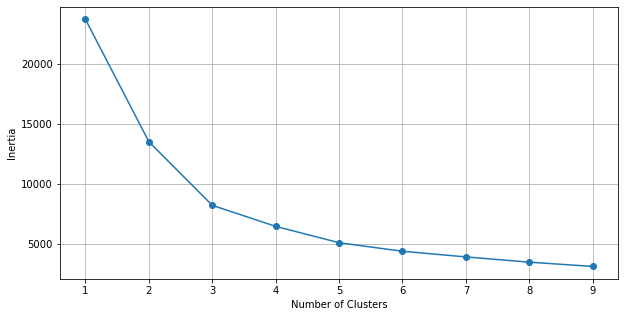

In [267]:
optimise_k_means(well[['DENS_T', 'NEUT_T']], 10)

In the plot above, we can see that the inertia (sum of the squared distances to the nearest cluster center) decreases as we increase the number of clusters. We can see that there is a big change in inertia and slope from 2 clusters onwards

### Fitting the Clustering Models

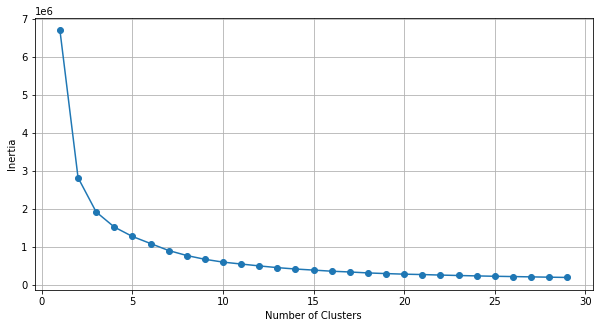

In [268]:
optimise_k_means(well[['GR', 'DENS', 'NEUT', 'DTC']], 30)

In the plot above, we can see that the inertia (sum of the squared distances to the nearest cluster center) decreases as we increase the number of clusters. There is no clear defined break within this dataset, however, we can see that the slope changes from about 5 clusters onwards. The picking of this value will be dependent on the interpreter and could range from 4 to 10.

So for this example we will take 5 as the optimum number of clusters.

### Fitting the Clustering Models

## Applying K Means Clustering

In [269]:
Kmeans = KMeans(n_clusters=3)

In [270]:
Kmeans.fit(well[['DENS_T', 'NEUT_T']], 10)

KMeans(n_clusters=3)

In [271]:
Kmeans.fit(well[['GR', 'DENS', 'NEUT', 'DTC']], 30)

KMeans(n_clusters=3)

In [272]:
well['Kmeans_3'] = Kmeans.labels_

In [273]:
well

,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESS,...,CALI_T,DENS_T,DRHO_T,DTC_T,GR_T,NEUT_T,RESD_T,RESS_T,SP_T,Kmeans_3
DEPTH,,,,,,,,,,,,,,,,,,,,,
1047.1404,12.25,12.5827,2.3200,0.01474,131.0879,96.5691,0.3552,3.2072,1.7545,1.3217,...,0.914009,-0.863653,0.064055,2.431111,0.629212,0.969823,-0.029588,-0.118081,-0.826223,2
1047.2928,12.25,12.6405,2.3027,0.00971,133.4555,97.1223,0.3569,3.1241,1.7213,1.2993,...,0.947679,-1.037394,-0.135069,2.583451,0.659919,0.990137,-0.029654,-0.118671,-0.883969,2
1047.4452,12.25,12.6984,2.2854,0.00467,135.8230,97.6755,0.3586,3.0410,1.6880,1.2770,...,0.981408,-1.211134,-0.334589,2.735786,0.690626,1.010451,-0.029721,-0.119259,-0.941706,2
1047.5976,12.25,12.7394,2.2790,0.00319,137.8991,97.4284,0.3603,3.0260,1.6597,1.2560,...,1.005291,-1.275408,-0.393179,2.869371,0.676910,1.030765,-0.029777,-0.119812,-0.928239,2
1047.7500,12.25,12.7711,2.2788,0.00370,139.8116,96.7319,0.3620,3.0494,1.6341,1.2358,...,1.023757,-1.277417,-0.372989,2.992429,0.638249,1.051079,-0.029829,-0.120344,-0.874788,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3478.8348,8.50,8.6053,2.5522,0.05202,48.8714,117.6758,0.1865,3.6850,11.1861,10.3653,...,-1.402939,1.468286,1.539870,-2.859031,1.800787,-1.046050,-0.010712,0.120142,0.722124,0
3478.9872,8.50,8.6531,2.5505,0.06100,48.5646,121.8867,0.1067,3.2586,12.5267,10.9448,...,-1.375094,1.451214,1.895364,-2.878772,2.034523,-1.999616,-0.008029,0.135407,0.589248,0
3479.1396,8.50,8.6975,2.5374,0.08276,49.7781,118.7337,0.0984,3.4343,10.8417,9.8769,...,-1.349230,1.319653,2.756783,-2.800690,1.859509,-2.098796,-0.011401,0.107277,0.527133,0


## Plotting The Results

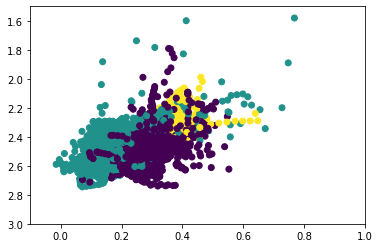

In [274]:
plt.scatter(x=well['NEUT'], y=well['DENS'], c=well['Kmeans_3'])
plt.xlim(-0.1, 1)
plt.ylim(3, 1.5)
plt.show()

## Creating Multiple Clusters

In [275]:
for k in range(1, 6):
    Kmeans=KMeans(n_clusters=k)
    Kmeans.fit(well[['DENS_T', 'NEUT_T']])
    well[f'KMeans_{k}'] = Kmeans.labels_

In [276]:
well

,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESS,...,NEUT_T,RESD_T,RESS_T,SP_T,Kmeans_3,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
DEPTH,,,,,,,,,,,,,,,,,,,,,
1047.1404,12.25,12.5827,2.3200,0.01474,131.0879,96.5691,0.3552,3.2072,1.7545,1.3217,...,0.969823,-0.029588,-0.118081,-0.826223,2,0,1,0,2,3
1047.2928,12.25,12.6405,2.3027,0.00971,133.4555,97.1223,0.3569,3.1241,1.7213,1.2993,...,0.990137,-0.029654,-0.118671,-0.883969,2,0,1,0,2,3
1047.4452,12.25,12.6984,2.2854,0.00467,135.8230,97.6755,0.3586,3.0410,1.6880,1.2770,...,1.010451,-0.029721,-0.119259,-0.941706,2,0,1,0,2,3
1047.5976,12.25,12.7394,2.2790,0.00319,137.8991,97.4284,0.3603,3.0260,1.6597,1.2560,...,1.030765,-0.029777,-0.119812,-0.928239,2,0,1,0,2,3
1047.7500,12.25,12.7711,2.2788,0.00370,139.8116,96.7319,0.3620,3.0494,1.6341,1.2358,...,1.051079,-0.029829,-0.120344,-0.874788,2,0,1,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3478.8348,8.50,8.6053,2.5522,0.05202,48.8714,117.6758,0.1865,3.6850,11.1861,10.3653,...,-1.046050,-0.010712,0.120142,0.722124,0,0,0,2,3,1
3478.9872,8.50,8.6531,2.5505,0.06100,48.5646,121.8867,0.1067,3.2586,12.5267,10.9448,...,-1.999616,-0.008029,0.135407,0.589248,0,0,0,1,0,1
3479.1396,8.50,8.6975,2.5374,0.08276,49.7781,118.7337,0.0984,3.4343,10.8417,9.8769,...,-2.098796,-0.011401,0.107277,0.527133,0,0,0,1,0,1


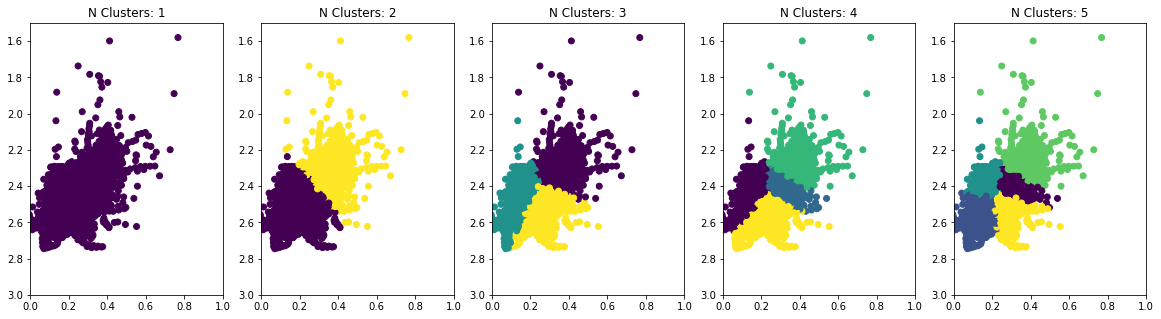

In [277]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=well['NEUT'], y=well['DENS'], c=well[f'KMeans_{i}'])
    ax.set_ylim(3, 1.5)
    ax.set_xlim(0, 1)
    ax.set_title(f'N Clusters: {i}')


## Clustering - Unsupervised

In [278]:
# Create the KMeans model with the selected number of clusters
kmeans = KMeans(n_clusters=5)

# Fit the model to our dataset
kmeans.fit(well[['GR', 'DENS', 'NEUT', 'DTC']])

# Assign the data back to the workingdf
well['KMeans'] = kmeans.labels_

To make the comparison simple, we will use the same number of clusters in the Gaussian Mixture Model. For this model the number of clusters parameter is known as n_components.

In [279]:
# Create the gmm model with the selected number of clusters/components
gmm = GaussianMixture(n_components=5)

# Fit the model to our dataset
gmm.fit(well[['GR', 'DENS', 'NEUT', 'DTC']])

# Predict the labels
gmm_labels = gmm.predict(well[['GR', 'DENS', 'NEUT', 'DTC']])

# Assign the labels back to the well
well['GMM'] = gmm_labels

### Viewing Results on Scatterplots / Crossplots

Another way to view the performance of the clustering is through scatter plots. We can do this using the common density-neutron scatterplots / crossplots and using matplotlib.

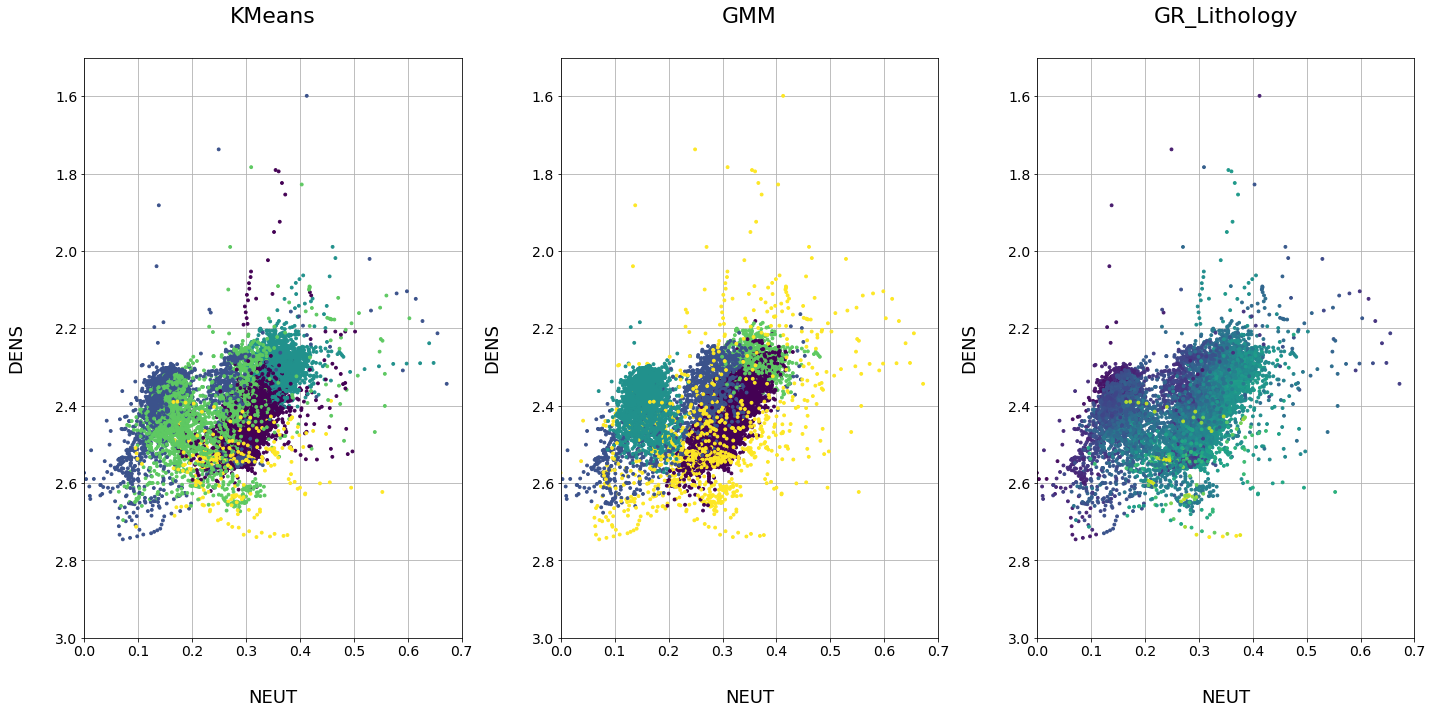

In [280]:
fig, ax = plt.subplots(figsize=(20,10))
ax1 = plt.subplot2grid((1,3), (0,0))
ax1.scatter(well['NEUT'], well['DENS'], c=well['KMeans'], s=8,)
ax1.set_title('KMeans', fontsize=22, y=1.05)

ax2 = plt.subplot2grid((1,3), (0,1))
ax2.scatter(well['NEUT'], well['DENS'], c=well['GMM'], s=8)
ax2.set_title('GMM', fontsize=22, y=1.05)

ax3 = plt.subplot2grid((1,3), (0,2))
ax3.scatter(well['NEUT'], well['DENS'], c=well['GR'], s=8)
ax3.set_title('GR_Lithology', fontsize=22, y=1.05)

for ax in [ax1, ax2, ax3]:
    ax.set_xlim(0, 0.7)
    ax.set_ylim(3, 1.5)
    ax.set_ylabel('DENS', fontsize=18, labelpad=30)
    ax.set_xlabel('NEUT', fontsize=18, labelpad=30)
    ax.grid()
    ax.set_axisbelow(True)

    ax.tick_params(axis='both', labelsize=14)
plt.tight_layout()

In the KMeans grouping, this cluster shows as one complete cluster, however, in the GMM method we can see it matches closer to the supplied lithology.

### Viewing Results on a Pairplot
As we used four input curves for our model, we should look at all of these to see how the clusters vary. The best way to do this is to use the excellent pairplot from the seaborn library. This plot displays the relationships between the data in the dataset on a grid. This allows a quick and easy way to identify and visualise the data. Along the diagonal the distribution of the data split by cluster is also plotted.

As we are looking at well number 4 we need to pass in that dataframe to the pairplot (dfs_wells[4])

In [ ]:
sns.pairplot(well, vars=['GR', 'DENS','NEUT', 'DTC'], hue='KMeans', palette='Dark2',
             diag_kind='kde', plot_kws = {'s': 15, 'marker':'o', 'alpha':1})

In [ ]:
sns.pairplot(well, vars=['GR', 'DENS','NEUT', 'DTC'], hue='GMM', palette='Dark2',
             diag_kind='kde', plot_kws = {'s': 15, 'marker':'o', 'alpha':1})

This provides us a much nicer plot to look at and also allows us to see how the data is clustered in the other logging curves. We can see that the GMM model provides some improvement in defining the clusters, especially in the DTC vs RHOB plot.

***Thanks for reading!***

*If you have found this article useful, please feel free to check out my other articles looking at various aspects of Python and well log data. You can also find my code used in this article and others at [GitHub](https://github.com/isaacabrahamodeh).*

# References

Bormann, Peter, Aursand, Peder, Dilib, Fahad, Manral, Surrender, & Dischington, Peter. (2020). FORCE 2020 Well well log and lithofacies dataset for machine learning competition [Data set]. Zenodo. http://doi.org/10.5281/zenodo.4351156